In [1]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [2]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'


RANDOM_STATE = 24 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)

TEST_SIZE  = 0.2 # Size of test data
NOISE = 0.2
EPOCHS = 201
ALPHA = 0.001
N_SAMPLE  = 1000


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [3]:
X,y  = make_moons(n_samples=N_SAMPLE,noise=NOISE,random_state=RANDOM_STATE,shuffle=True)


type(X),type(y)


(numpy.ndarray, numpy.ndarray)

In [4]:
X[:5],y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

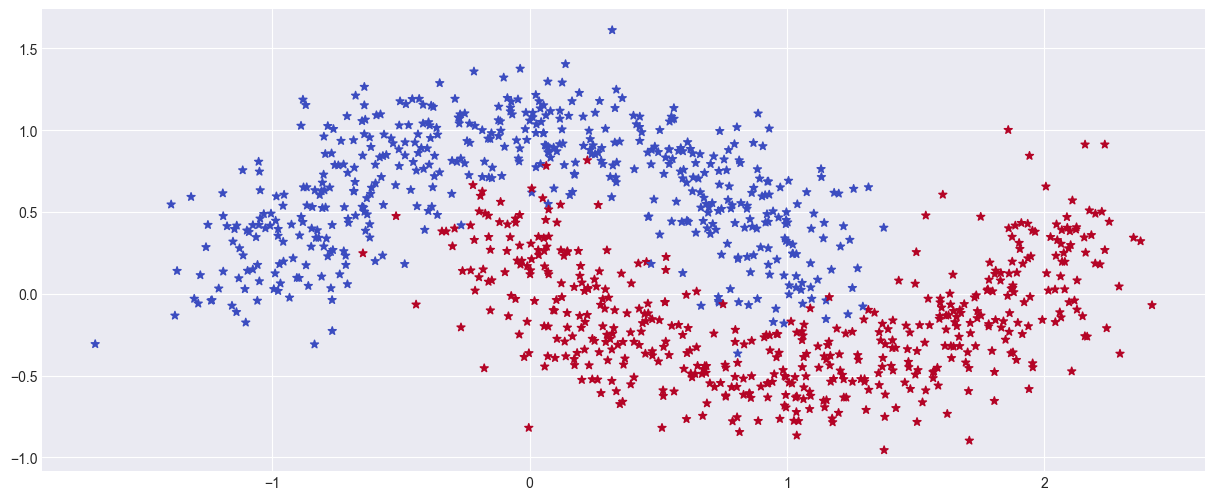

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap= CMAP,marker='*')


In [6]:
data_df = pd.DataFrame(X,columns=['A','B'])
data_df['target'] = y
data_df

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0
...,...,...,...
995,-1.005476,0.490728,0
996,-0.484457,0.846436,0
997,0.284856,0.793560,0
998,1.712514,-0.177786,1


In [7]:
data_train,data_test  = data_df.to_numpy()[:900],data_df.to_numpy()[900:]
data_train.shape,data_test.shape

((900, 3), (100, 3))

In [8]:
def predict(row,weights):
    z = weights[0]
    for i in range(len(row) - 1):
        z += weights[i+1] * row[i]
    return 1 if z >= 0 else 0

weights = np.array([0.1,2.0,1.0])
predict(data_df.loc[0].to_numpy(),weights)

1

In [9]:
def train_weights(train,alpha,n_epoch):
    error = [] #to trrack error 
    weights = rng.random(train.shape[1]) #initialize random weights 
    m = train.shape[0] #total rowns 
    for epoch in range(n_epoch): 
        sum_error = 0
        for row in train:
            prediction = predict(row,weights)
            dz = prediction - row[-1] #a-y
            sum_error += (prediction - row[-1])**2
            weights[0] = weights[0] - alpha * dz
            for i in range(len(row) - 1):
                weights[i+1] = weights[i+1] - alpha *dz *row[i]
        error.append(sum_error/m)#AVERAGE ERROR
    return error,weights

In [10]:
error,weights = train_weights(train=data_train,alpha = ALPHA,n_epoch=EPOCHS)
error[:5],weights

([np.float64(0.44),
  np.float64(0.45222222222222225),
  np.float64(0.39444444444444443),
  np.float64(0.29777777777777775),
  np.float64(0.2)],
 array([-0.00073116,  0.00253448, -0.00399941]))

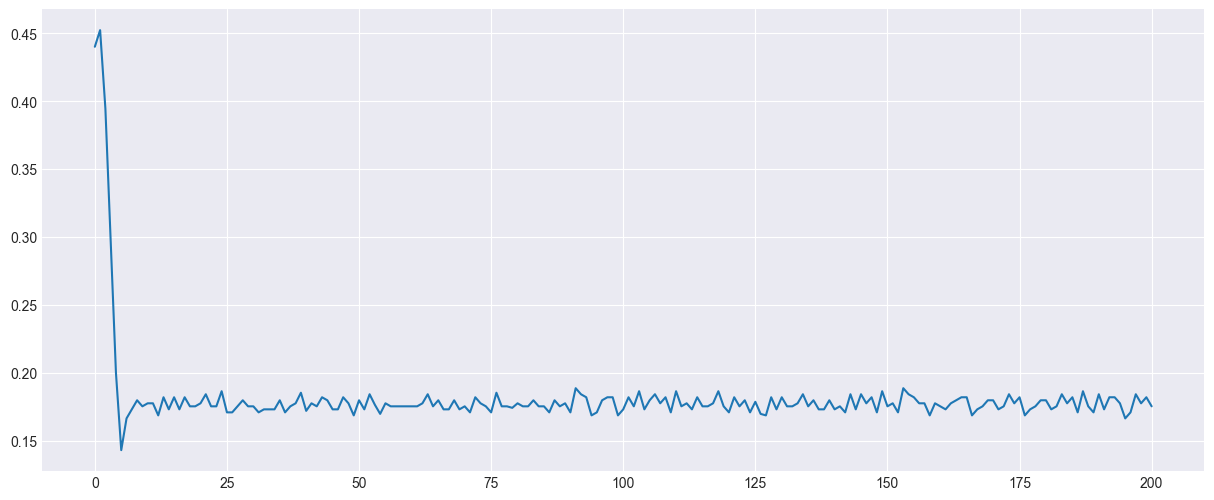

In [11]:
fig,ax = plt.subplots()
ax.plot(error)

[[-1.78879487 -1.78879487]
 [-1.77879487 -1.78879487]
 [-1.76879487 -1.78879487]
 ...
 [ 2.49120513  2.51120513]
 [ 2.50120513  2.51120513]
 [ 2.51120513  2.51120513]]


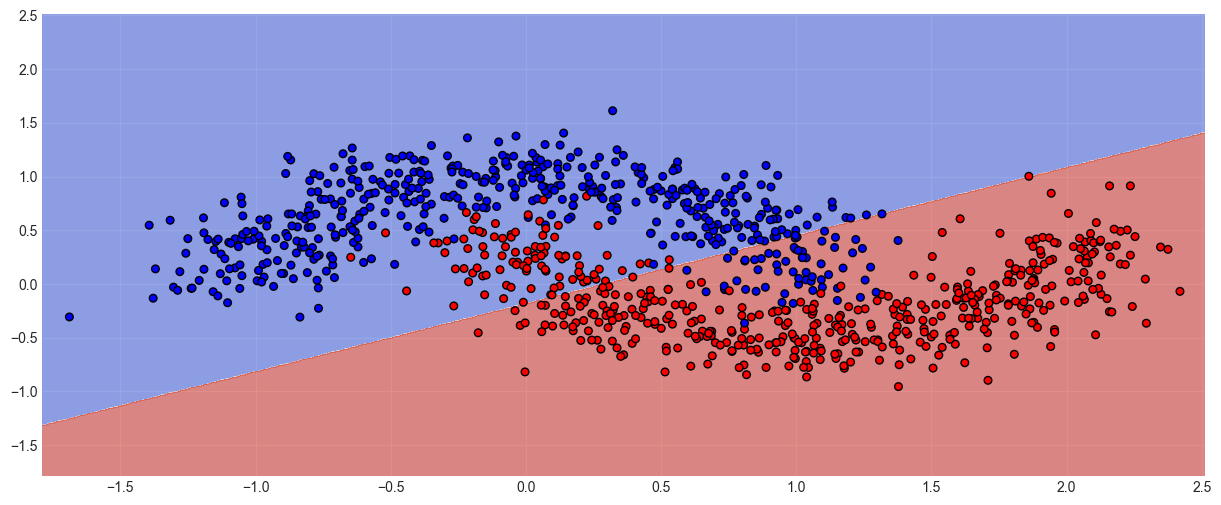

In [12]:
fig,ax = plt.subplots()

dm = 0.01
margin = 10*dm

x_max,x_min = X[:,0].max() + margin, X[:,0].min() - margin
y_max,y_min = X[:,0].max() + margin, X[:,0].min() - margin


xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),
                    np.arange(y_min,y_max,dm))
X_plot = np.c_[xx.ravel(),yy.ravel()]
print(X_plot)
X_plot = np.hstack((X_plot,np.ones((X_plot.shape[0],1))))

y_pred = []
for row in (X_plot):
    y_p = predict(row,weights)
    y_pred.append(y_p)

Z = np.array(y_pred).reshape(xx.shape)
ax.contourf(xx,yy,Z,alpha = 0.6,cmap = CMAP);
ax.scatter(X[:,0],X[:,1],s = 30,cmap = plt.cm.bwr, c = y,edgecolors='k')

In [13]:
y_pred = []
for i in range(len(X)):
    y_pred.append(predict(X[i],weights))

y_pred = np.array(y_pred)
y_pred,y_true

NameError: name 'y_true' is not defined

In [ ]:
accuracy_score(y_true,y_pred)

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_true,y_pred)).plot()

<h1><t></t>    ^</h1>
<h1>Assignment1 </h1>